# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [5]:

url = "https://api.openweathermap.org/data/2.5/weather?"
# Build variable to convert tempature and wind speed units of measure
units = "imperial"

# Build list to hold quary data
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Temperature = [] 
Latitude = []
Longitude = []
Wind_Speed = []

try:
    quarry_url = requests.get(f'{url}appid={api_key}&q={city}&units={units}').json()
    time.sleep(1)
    #print(quarry_url)
    #print(quarry_url.keys())
    City.append(quarry_url['name'])
    Cloudiness.append(quarry_url['clouds']['all'])
    Country.append(quarry_url['sys']['country'])
    Date.append(quarry_url['dt'])
    Humidity.append(quarry_url['main']['humidity'])
    Temperature.append(quarry_url['main']['temp_max'])
    Latitude.append(quarry_url['coord']['lat'])
    Longitude.append(quarry_url['coord']['lon'])
    Wind_Speed.append(quarry_url['wind']['speed'])
except KeyError:
    print("City not found. Skipping...")
quarry_url

{'coord': {'lon': -68.31, 'lat': -54.81},
 'weather': [{'id': 601,
   'main': 'Snow',
   'description': 'snow',
   'icon': '13d'}],
 'base': 'stations',
 'main': {'temp': 36.79,
  'pressure': 992,
  'humidity': 100,
  'temp_min': 33.8,
  'temp_max': 39.2},
 'visibility': 2000,
 'wind': {'speed': 23.04, 'deg': 230},
 'clouds': {'all': 90},
 'dt': 1563821049,
 'sys': {'type': 1,
  'id': 8303,
  'message': 0.0064,
  'country': 'AR',
  'sunrise': 1563799132,
  'sunset': 1563828008},
 'timezone': -10800,
 'id': 3833367,
 'name': 'Ushuaia',
 'cod': 200}

{'coord': {'lon': 18.42, 'lat': -33.93}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 57.02, 'pressure': 1009, 'humidity': 87, 'temp_min': 54, 'temp_max': 61}, 'visibility': 4000, 'wind': {'speed': 27.51, 'deg': 350}, 'clouds': {'all': 90}, 'dt': 1563820802, 'sys': {'type': 1, 'id': 1899, 'message': 0.0099, 'country': 'ZA', 'sunrise': 1563774356, 'sunset': 1563811152}, 'timezone': 7200, 'id': 3369157, 'name': 'Cape Town', 'cod': 200}


In [ ]:
#ict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [ ]:
#Build counter to log cities
count = 0
for location in cities: 
    print("Beginng Data Retreval \n ----------------------------")
    while (count < 50):
        count =+ 1
    print(f"Processing Record len(cities) of Set {count} | {location}")

In [20]:
# Convert to DataFrame
#quarry_url_df = pd.DataFrame(weather_data)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [63]:
weather_info.to_csv("weather_data.csv", encoding="utf-8", index=False)

In [34]:
#Create Dataframe with City Data
weather_info = pd.DataFrame({"City":City,"Cloudiness":Cloudiness,"Country":Country,"Date":Date,"Humidity":Humidity,
                             "Latitude":Latitude,"Longitude":Longitude,"Max Temp":Temperature,"Wind Speed":Wind_Speed})
weather_info

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Cape Town,90,ZA,1563819851,87,-33.93,18.42,61,27.51
1,Cape Town,90,ZA,1563819851,87,-33.93,18.42,61,27.51


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [60]:
#Create a function which develops plot & plot lables

def plot_info(x=None, y=None):
    today = datetime.now()
    today_str = today.strftime('%m/%d/%Y')
    plt.title(f" City {x} vs. {y} {today_str}")

    x_array = weather_info[x]
    y_array = weather_info[y]
    
# Incorporate the other graph properties       
    plt.scatter(x_array,y_array)    
    plt.xlabel("Latitude")
    plt.ylabel(y)
    plt.grid()
    
# Save Figure
    plt.savefig(f'image_{y}.png')
    plt.show()

#### Latitude vs. Temperature Plot

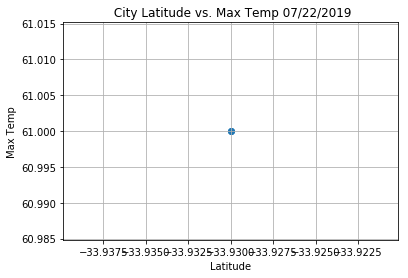

In [61]:
plot_info('Latitude', 'Max Temp')

#### Latitude vs. Humidity Plot

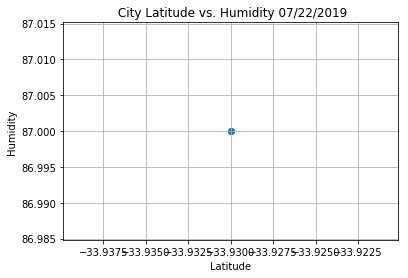

In [53]:
plot_info('Latitude', 'Humidity')

#### Latitude vs. Cloudiness Plot

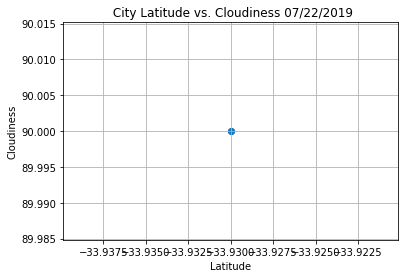

In [58]:
plot_info('Latitude', 'Cloudiness')

#### Latitude vs. Wind Speed Plot

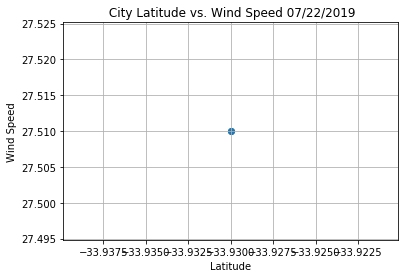

In [59]:
plot_info('Latitude', 'Wind Speed')

# Appraching the equator, weather conclusions:

1.
2.
3.
